<a href="https://www.kaggle.com/code/tusharaggarwal27/decision-tree-tusharaggarwal27?scriptVersionId=112390623" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network/Social_Network_Ads.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


In [3]:
#Reading the data file
social_data = pd.read_csv('/kaggle/input/social-network/Social_Network_Ads.csv')

In [4]:
#Printing the head for data
social_data.head(11)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
#Checking info for the data
social_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# Selecting data using iloc - Here we select all rows but only required columns


In [6]:
#Seprating for features and target variable

X = social_data.iloc[:, [2,3]].values
y = social_data.iloc[:,4].values

In [7]:
#Checking for columns
#print(X), print(y)

## Splitting the dataset into the Training set and Test set


In [8]:
#Splitting train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.3,random_state=0)

In [9]:
#Checking X_train, X_test, y_train, y_test shapes
print(X_train.shape), print(X_test.shape), print(y_train.shape), print(y_test.shape)

(280, 2)
(120, 2)
(280,)
(120,)


(None, None, None, None)

**Feature Scaling**

Here we only scale X_train and X_test


In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # creating the instance

In [11]:
#Standardizing the features
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [12]:
#Checking X_train, X_test
print(X_train), print(X_test)

[[-1.1631724  -1.5849703 ]
 [ 2.17018137  0.93098672]
 [ 0.0133054   1.22017719]
 [ 0.20938504  1.07558195]
 [ 0.40546467 -0.48604654]
 [-0.28081405 -0.31253226]
 [ 0.99370357 -0.8330751 ]
 [ 0.99370357  1.8563962 ]
 [ 0.0133054   1.24909623]
 [-0.86905295  2.26126285]
 [-1.1631724  -1.5849703 ]
 [ 2.17018137 -0.80415605]
 [-1.35925203 -1.46929411]
 [ 0.40546467  2.2901819 ]
 [ 0.79762394  0.75747245]
 [-0.96709276 -0.31253226]
 [ 0.11134522  0.75747245]
 [-0.96709276  0.55503912]
 [ 0.30742485  0.06341534]
 [ 0.69958412 -1.26686079]
 [-0.47689368 -0.0233418 ]
 [-1.7514113   0.3526058 ]
 [-0.67297331  0.12125343]
 [ 0.40546467  0.29476771]
 [-0.28081405  0.06341534]
 [-0.47689368  2.2901819 ]
 [ 0.20938504  0.03449629]
 [ 1.28782302  2.20342476]
 [ 0.79762394  0.26584866]
 [-0.28081405  0.15017248]
 [ 0.0133054  -0.54388463]
 [-0.18277423  0.15017248]
 [-0.08473441  0.23692961]
 [ 0.0133054  -0.25469417]
 [ 2.17018137  1.104501  ]
 [-1.7514113   0.3526058 ]
 [ 1.87606192  0.12125343]
 

(None, None)

In [13]:
#Importing the model DecisionTreeClassifier as target will be binary

from sklearn.tree import DecisionTreeClassifier

## Building the DT Model using the Training data
## Here we create a DT classifier object.


In [14]:
#Creting the insatance
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [15]:
#Fitting the model on trainig data
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [16]:
#Predicting on "Test Data"
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 1]


In [17]:
#Checking for 
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]]


In [18]:
#Getting the confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[71  8]
 [ 5 36]]


0.8916666666666667

In [19]:
#Getting the confusion matrix and accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report

cm=confusion_matrix(y_test, y_pred)

print(cm)
accuracy_score(y_test, y_pred)

[[71  8]
 [ 5 36]]


0.8916666666666667

In [20]:
#printing Classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        79
           1       0.82      0.88      0.85        41

    accuracy                           0.89       120
   macro avg       0.88      0.89      0.88       120
weighted avg       0.89      0.89      0.89       120



**Predicting the result for a new value**


In [21]:
print(classifier.predict(sc.transform([[25,50000]])))

[0]


**Visualizing the training data set results**


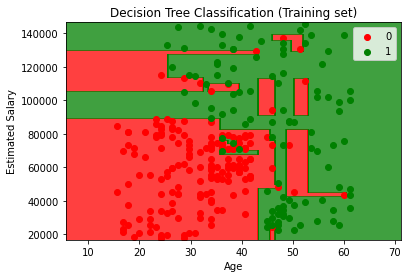

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
